In [8]:
from matplotlib import pyplot as plt, animation
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

%matplotlib notebook

# Upute za preuzimanje zadataka

Posjetiti stranicu *[Advent of Code](https://adventofcode.com)*. Na toj stranici napraviti acconut (moze se koristiti github/email) i kopirati svoj session. Pozvati fju get_aoc_input sa session_str jednakim session-u i danom i godinom zadatka.

In [2]:
import requests
import os

def get_aoc_input(session_str, day, year):
    
    if os.path.exists(f'./{year}_{day}_input.txt'):
        with open(f'{year}_{day}_input.txt') as f:
            text = [x.strip() for x in f.readlines()]
        return text
    else:
        response = requests.get(
            f'https://adventofcode.com/{year}/day/{day}/input',
            headers={'cookie':f'session={session_str}'}
        )
    
        try:
            with open(f'{year}_{day}_input.txt', 'w') as f:
                f.write(response.text)
            return response.text.strip()
        except Exception as e:
            print(f'Error: {e.args}')
            return None

In [3]:
session = '53616c7465645f5fa84cdf4fd1e667823de36970c380c49a1373a1ac0d5a4ddf77aeb87eda22f992bac9a4e24fa8295f06c385916e074b59f6ba4ee8e53b2612'
inlist = get_aoc_input(session, 23, 2018)

In [11]:
import re
from collections import Counter

def parse_line(line):
    return tuple(map(int, re.match(r'pos=<(-?\d+),(-?\d+),(-?\d+)>, r=(\d+)', line).groups()))

def manh_dist(point1, point2):
    return sum(abs(point1[i] - point2[i]) for i in range(3))

inputs = [parse_line(line) for line in inlist]
c = Counter()
for n1 in inputs:
    for n2 in inputs:
        if manh_dist(n1,n2) <= n1[-1]:
            c[n1] += manh_dist(n1,n2) <= n1[-1]

n = sorted(c.keys(), key=lambda x: x[-1], reverse=True)[0]
print(c[n])

420


In [12]:
from z3 import *

def zabs(x):
    return If(x >= 0,x,-x)

(x,y,z) = (Int('x'),Int('y'),Int('z'))
in_ranges = [Int(f'in_range_{i}') for i in range(len(inputs))]
range_count = Int('sum')
dist_from_zero = Int('dist')

o = Optimize()
for i in range(len(inputs)):
    nx,ny,nz,nr = inputs[i]
    o.add(in_ranges[i] == If(zabs(x-nx) + zabs(y-ny) + zabs(z-nz) <= nr, 1, 0))   
o.add(range_count == sum(in_ranges))
o.add(dist_from_zero == zabs(x) + zabs(y) + zabs(z))

In [13]:
h1 = o.maximize(range_count)
h2 = o.minimize(dist_from_zero)
print(o.check())
print(o.lower(h2), o.upper(h2))

sat
124276103 124276103


# Lanternfish

*[Link na zadatak](https://adventofcode.com/2021/day/6)*

In [19]:
from collections import deque
import re
import itertools as it

Dohvatimo input za zadatak i pocnimo :)

In [5]:
session = '53616c7465645f5fa84cdf4fd1e667823de36970c380c49a1373a1ac0d5a4ddf77aeb87eda22f992bac9a4e24fa8295f06c385916e074b59f6ba4ee8e53b2612'
get_aoc_input(session, 6, 2021)

'5,1,5,3,2,2,3,1,1,4,2,4,1,2,1,4,1,1,5,3,5,1,5,3,1,2,4,4,1,1,3,1,1,3,1,1,5,1,5,4,5,4,5,1,3,2,4,3,5,3,5,4,3,1,4,3,1,1,1,4,5,1,1,1,2,1,2,1,1,4,1,4,1,1,3,3,2,2,4,2,1,1,5,3,1,3,1,1,4,3,3,3,1,5,2,3,1,3,1,5,2,2,1,2,1,1,1,3,4,1,1,1,5,4,1,1,1,4,4,2,1,5,4,3,1,2,5,1,1,1,1,2,1,5,5,1,1,1,1,3,1,4,1,3,1,5,1,1,1,5,5,1,4,5,4,5,4,3,3,1,3,1,1,5,5,5,5,1,2,5,4,1,1,1,2,2,1,3,1,1,2,4,2,2,2,1,1,2,2,1,5,2,1,1,2,1,3,1,3,2,2,4,3,1,2,4,5,2,1,4,5,4,2,1,1,1,5,4,1,1,4,1,4,3,1,2,5,2,4,1,1,5,1,5,4,1,1,4,1,1,5,5,1,5,4,2,5,2,5,4,1,1,4,1,2,4,1,2,2,2,1,1,1,5,5,1,2,5,1,3,4,1,1,1,1,5,3,4,1,1,2,1,1,3,5,5,2,3,5,1,1,1,5,4,3,4,2,2,1,3'

Vidimo da je input jako lijepo formatiran (ako se radi u python-u ;), to se lako obradi uz malo `str`/`np.loadtxt` magije

# Rjesenje pomocu numpy-a

In [223]:
lines = np.loadtxt('2021_6_input.txt', delimiter=',', dtype="uint32")
fish_timer = np.zeros(9)
time, count = np.unique(lines, return_counts=True)
fish_timer[time] = count

In [222]:
def memoize_numpy(fish_timer, days):
    gen = np.copy(fish_timer)
    for _ in range(days):
        gen[7] += gen[0]
        gen = np.roll(gen, -1)
    return sum(gen)

In [169]:
print(memoize_numpy(fish_timer, 80))
print(memoize_numpy(fish_timer, 256))

362346.0
1639643057051.0


<IPython.core.display.Javascript object>


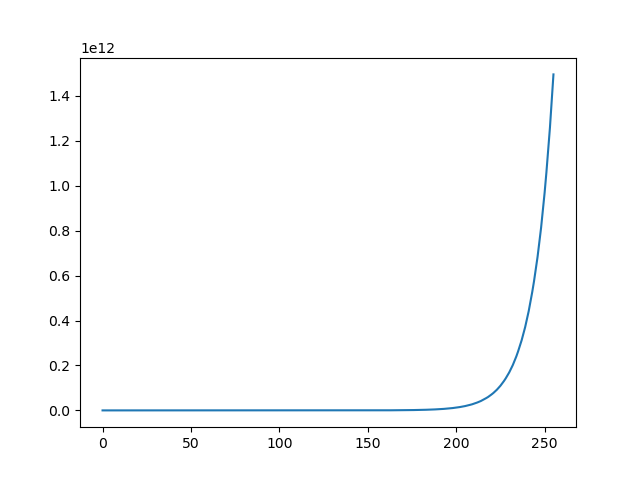

In [225]:
def generator(fish_timer, days):
    for i in range(days):
        yield memoize_numpy(fish_timer, i)

y = [x for x in generator(fish_timer, 256)]

fig, ax = plt.subplots()
ax.plot(y)
plt.show()

# Rjesenje pomocu vulgaris python-a :)

In [54]:
with open('2021_6_input.txt') as f:
    inlist = list(map(int, f.readline().strip().split(',')))
d = deque([0 for _ in range(9)])
for num in inlist:
    d[num] += 1

In [55]:
def memoize_pure_python(deq, days):
    d = deque([x for x in deq])
    for _ in range(days):
        d[7] += d[0]
        d.rotate(-1)
    return sum(d)

In [56]:
print(memoize_pure_python(d, 80))
print(memoize_pure_python(d, 256))

362346
1639643057051


# Smoke Basin

*[Link na zadatak](https://adventofcode.com/2021/day/9)*

In [58]:
def largest_basins(inlist, low):
    basins = []
    for (xx,yy) in low:
        seen = set()
        Q = [(xx,yy)]
        points = []
        temp = []
        while len(Q) > 0:
            curr = Q.pop(0)
            x,y = curr
            if curr in seen: continue
            seen.add(curr)
            if y < 0 or y > len(inlist) - 1 or x < 0 or x > len(inlist[0]) - 1: continue
            if int(inlist[y][x]) == 9: continue
            if len(points) == 0:
                points.append(int(inlist[y][x]))
                temp.append((y,x))
            else:
                if int(inlist[y][x]) != 9:
                    points.append(int(inlist[y][x]))
            Q+= [(x+1,y), (x-1,y), (x,y+1), (x,y-1)]
        basins.append(len(points))
    basins.sort()
    print(f'Size of the largest three basins: {basins[-1]}, {basins[-2]}, {basins[-3]}')
    print(f'Those numbers multiplied: {basins[-1] * basins[-2] * basins[-3]}')


In [59]:
def num_of_low_spots(inlist, matrix, low):
    s = 0
    for j,line in enumerate(inlist):
        for i,l in enumerate(line):
            ok = True
            for x in [-1,0,1]:
                for y in [-1,0,1]:
                    if x * y == 0 and x != y and -1 < y + j < len(inlist) and -1 < x + i < len(line):
                        ok &= int(inlist[y+j][x+i]) > int(l)
            if ok:
                s += 1+int(l)
                low.append((i,j))
                matrix[j][i] = 0
                yield matrix
            else:
                matrix[j][i] = 6 if matrix[j][i] != 9 else 9
    print(f'Number of low points: {s}')

In [60]:
session = '53616c7465645f5fa84cdf4fd1e667823de36970c380c49a1373a1ac0d5a4ddf77aeb87eda22f992bac9a4e24fa8295f06c385916e074b59f6ba4ee8e53b2612'
get_aoc_input(session, 9, 2021)

'9976557856799875679875642456989998767978931098989876587878999876565667896543210123567899876794310234\n8765432145789983989864321345978999954569532987679965426567899865423457899654329439698987665679442545\n9898553234567899898765432499767899895689549876567894312458998543212679998785698998999996543458953456\n8987668765679998769986753987656798799899698765456789101345697654323567899896797987899989542557894597\n7698778978895129954397864797543445678978939988367895212467899875534568999999986576789877410136789989\n7539989989943239865298985698432134799654329876238954324588921976646899889998765435698765321245695678\n4321398991294345976129876986553346999743219765359995435789890989887898767899754324569876434557894567\n9932357890989496987235999898764457898752102976998789756899789999999976556689865546894987678967942456\n7893459939878989998499989789898768987643244599896578997947567898899875434599986657975998989878921347\n689997891996557899998787567899997899875439569978946899893345898779865432367899876

Number of low points: 558


<IPython.core.display.Javascript object>


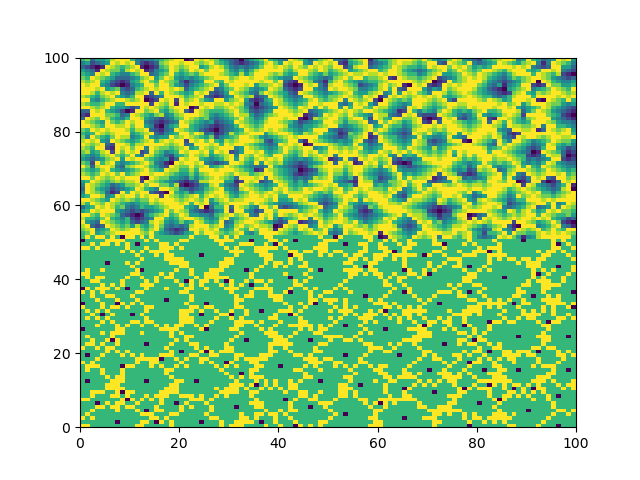

Size of the largest three basins: 101, 94, 93
Those numbers multiplied: 882942


In [137]:
inlist = [x.strip() for x in open('2021_9_input.txt').readlines()]
low = []
matrix = [[int(x) for x in line] for line in inlist]
matrixes = np.array([[[int(x) for x in line] for line in inlist]])

for m in num_of_low_spots(inlist, matrix, low):
    matrixes = np.append(matrixes, [m], axis=0)
    
fig, ax = plt.subplots()
cax = ax.pcolormesh(matrixes[0, :, :])

largest_basins(inlist, low)

In [138]:
def basin_animate(i):
    cax.set_array(matrixes[i, :, :])
    return cax

anim = animation.FuncAnimation(fig, basin_animate, interval=100, frames=matrixes.shape[0] - 1)
plt.show()